In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df = pd.read_csv('../Datasets/height-weight-simple.csv')

In [37]:
df.head()

,Height,Weight
0,175.58,77.16
1,151.00,48.05
2,161.00,62.58
3,158.93,53.48
4,179.46,77.76


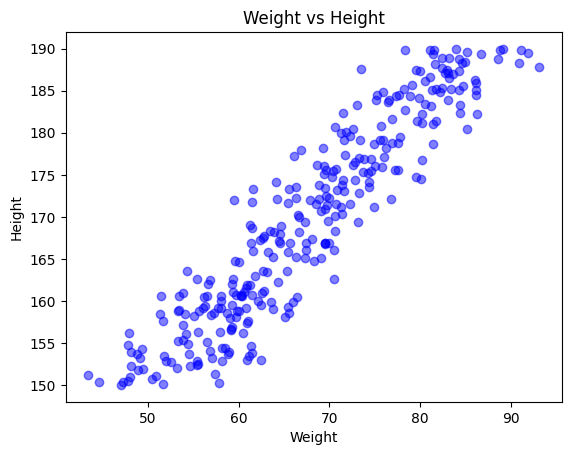

In [39]:
# Scatter plot of Height vs Height
plt.scatter(df['Weight'], df['Height'], color='blue', alpha=0.5)
plt.title('Weight vs Height')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

In [41]:
# correlation : helps to understand the strength and direction of the linear relationship between two variables.
correlation = df['Weight'].corr(df['Height'])
correlation

np.float64(0.9308928986106345)

the correlation coefficient between Weight and Height is approximately 0.94, indicating a strong positive linear relationship between the two variables.

In [44]:
# other way
df.corr()

,Height,Weight
Height,1.000000,0.930893
Weight,0.930893,1.000000


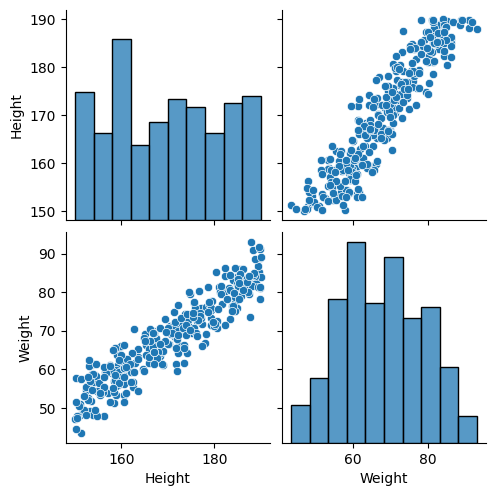

In [43]:
sns.pairplot(df)
plt.show()

In [50]:
# lets assume weight as independent variable and height as dependent variable
x_series = df['Weight']
type(x_series)

pandas.core.series.Series

In [51]:
x_series.shape

(300,)

Type of x_series is pandas.core.series.Series so we need to convert it into a dataframe or 2D array.

In [47]:
x = df[['Weight']]
type(x)

pandas.core.frame.DataFrame

In [48]:
x.shape

(300, 1)

Our Dependent variable y is also a Series. We can keep it as it is because sklearn will internally convert it into a 1D array.

In [52]:
y = df['Height']
y.shape

(300,)

In [ ]:
type(y)
# no issue here because sklearn can take series or 1D array as dependent variable

pandas.core.series.Series

### Train Test Split

- test_size=0.2 means 20% data will be used for testing and remaining 80% data will be used for training.
- random_state=42 is used to ensure reproducibility of the results.so that every time we run the code, we get the same train-test split.

In [56]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [57]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((240, 1), (60, 1), (240,), (60,))

Standardization is the process of scaling features so that they have a mean of 0 and a standard deviation of 1. This is important because many machine learning algorithms perform better when the input features are on a similar scale.

- We use StandardScaler from sklearn.preprocessing to standardize the features, that is, the independent variable (Weight) in this case.
- internally it uses the formula: z = (x - mean) / std_dev to standardize each feature.